In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [27]:
dump_contents = os.listdir('../dump_02')
filename_split = dump_contents[0].split('_')
dump_contents

['lattice_t_1.00_temp_328.20.bin',
 'lattice_t_2.00_temp_358.40.bin',
 'lattice_t_3.00_temp_388.60.bin',
 'lattice_t_4.00_temp_418.80.bin',
 'lattice_t_4.92_temp_446.64.bin',
 'lattice_t_5.62_temp_467.68.bin',
 'lattice_t_6.06_temp_481.12.bin',
 'lattice_t_6.53_temp_495.17.bin',
 'lattice_t_6.65_temp_498.77.bin',
 'lattice_t_6.79_temp_503.01.bin',
 'lattice_t_6.88_temp_505.83.bin',
 'lattice_t_6.92_temp_507.07.bin',
 'lattice_t_7.16_temp_514.18.bin',
 'lattice_t_7.22_temp_515.96.bin',
 'lattice_t_7.29_temp_518.27.bin',
 'lattice_t_7.34_temp_519.79.bin',
 'lattice_t_7.37_temp_520.50.bin',
 'lattice_t_7.39_temp_521.28.bin',
 'lattice_t_7.43_temp_522.44.bin',
 'lattice_t_7.56_temp_526.23.bin',
 'lattice_t_7.58_temp_526.83.bin',
 'lattice_t_7.60_temp_527.40.bin',
 'lattice_t_7.61_temp_527.88.bin',
 'lattice_t_7.64_temp_528.64.bin',
 'lattice_t_7.72_temp_531.26.bin',
 'lattice_t_7.74_temp_531.64.bin',
 'lattice_t_7.77_temp_532.79.bin',
 'lattice_t_7.78_temp_533.03.bin',
 'lattice_t_7.80_tem

In [9]:
cu_thickness = 100e-9  
distance = 2.54e-10
number_of_atoms_in_y = cu_thickness / distance 

# parameters
grid_dim_y = int(number_of_atoms_in_y)
grid_dim_x = grid_dim_y // 10

In [36]:
save_list = []
for i in list(range(10,90,16)):
    filename = dump_contents[i]
    filename_split = filename.split('_')
    time = filename_split[2]
    temperature = filename_split[-1].split('.')[0]
    lattice_raw = np.fromfile(f'../dump_02/{filename}')
    lattice = lattice_raw.reshape((grid_dim_y, grid_dim_x))
    data = [time, temperature, lattice]
    save_list.append(data)
    

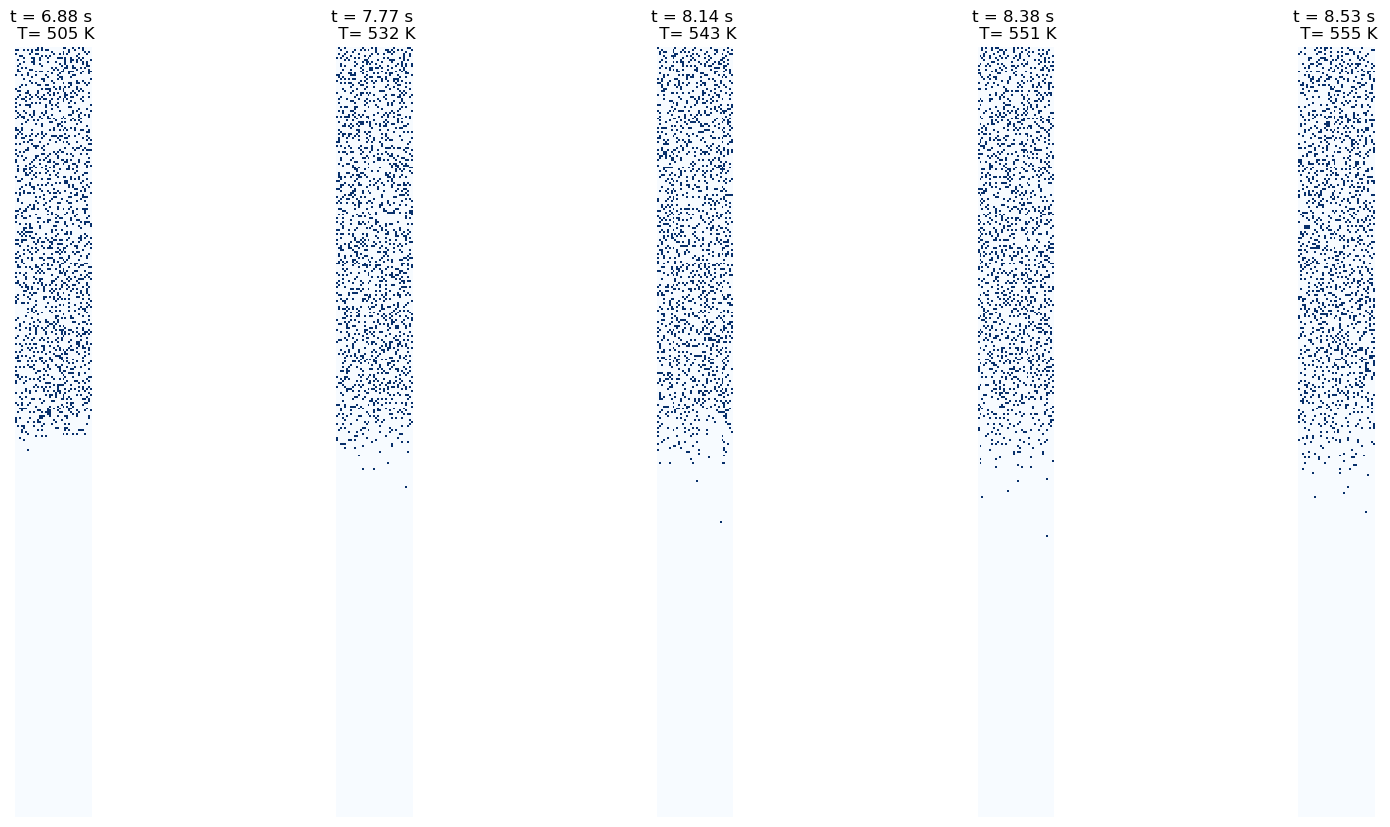

In [37]:
fig, axs = plt.subplots(ncols=5, figsize=(20, 10))
for i, (time, temperature, lattice) in enumerate(save_list):
    axs[i].axis('off')
    axs[i].set_title('t = {time} s \n T= {temperature} K'.format(time=time, temperature=temperature))
    sns.heatmap(lattice, cmap='Blues' , cbar=False, square=True, ax=axs[i], yticklabels=True, xticklabels=True)

In [161]:
data = []

for i in [0,2,4]:
    concentration = []
    time = save_list[i][0]
    temperature = save_list[i][1]
    array = save_list[i][2]
    for j in range(0,grid_dim_y):
        
        sum = array[j].sum()
        concentration.append(sum/grid_dim_x)
    data.append([time, temperature, concentration])
    
x = [i*distance for i in range(0,grid_dim_y)]
print(len(x), len(data[0][2]))

393 393


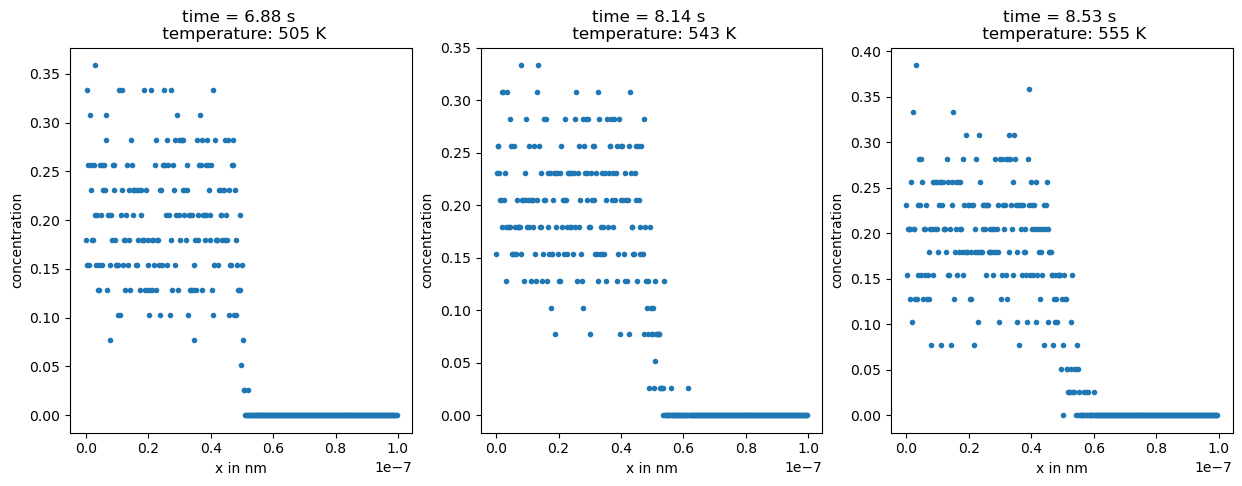

In [175]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

for i in [0,1,2]:
    ax[i].set_title('time = {t} s \n temperature: {T} K'.format(t=data[i][0], T=data[i][1]))
    ax[i].plot(x, data[i][2], '.')
    ax[i].set_xlabel('x in nm')
    ax[i].set_ylabel('concentration')
plt.savefig('../report/graphics/alcu_x_concentration_evolution.png')

In [6]:
for k, _ in enumerate(save_list):
    j = k % 6
    i = 0 if k < 6 else 1
    print(i, j)
    

0 0
0 1
0 2
0 3
0 4
0 5
1 0
1 1
1 2
1 3
1 4
1 5
